In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline  
%pylab inline
import seaborn as sns
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_csv('titanic_data.csv')
data_no_missing = data.dropna()
len(data_no_missing)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


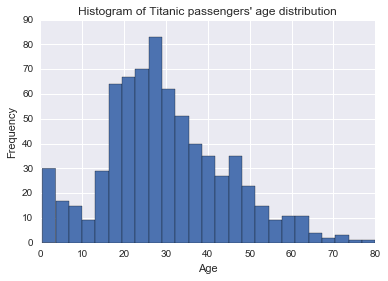

In [8]:
#Select the raws that age is not missing
data_clean_age = data[data['Age'].notnull()]
data_clean_age['Age'].count()
data_clean_age['Age'].describe()
data_clean_age['Age'].median()
data_clean_age['Age'].plot(kind='hist',bins=25)
plt.xlabel('Age')
plt.title("Histogram of Titanic passengers' age distribution")
plt.show()

In [28]:
Total = data.count()[0]
Total_clean_survive = data[data['Survived'].notnull()]
Total_survive  = data[data["Survived"]==1].count()[0]
Total_clean_survive.count()[0]
Freq_survive = Total_survive.astype('float') /Total_clean_survive.count()[0]
Freq_survive

0.38383838383838381

In [45]:
data_clean_embarked = data[data['Embarked'].notnull()]
#data["Embarked"].value_counts().sum()
Total_clean_embarked = data[data['Embarked'].notnull()]
Freq_embar = data["Embarked"].value_counts().astype('float')/Total_clean_embarked.count()[0]
Freq_embar

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [49]:
data[data['Sex']== 'male'].count()[0]/data['Sex'].count().astype('float')

0.6475869809203143

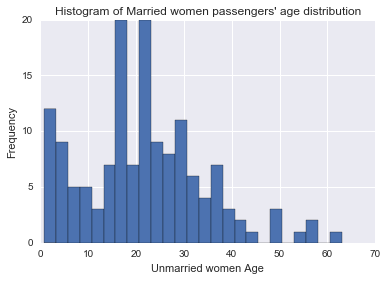

In [9]:
Unmarried_women = data[(data['Sex'] =='female') &(data['Name'].str.contains("Miss",na=False))] 
Unmarried_women['Age'].plot(kind='hist',bins=25)
plt.xlabel('Unmarried women Age')
plt.title("Histogram of Married women passengers' age distribution")
plt.show()

In [18]:
Umarried_women_adult = Unmarried_women[Unmarried_women['Age']>18]
Umarried_women_adult.groupby(['Pclass']).size()
len(Umarried_women_adult.index)
Umarried_women_adult.groupby(['Pclass']).size()/len(Umarried_women_adult.index)

Pclass
1    0.435294
2    0.223529
3    0.341176
dtype: float64

In [17]:
Umarried_women_adult = Unmarried_women[Unmarried_women['Age']>18]
Umarried_women_adult_survived = Umarried_women_adult.groupby(['Pclass','Survived']).size()
Umarried_women_adult_survived.unstack()

Survived,0,1
Pclass,,
1,1,36
2,2,17
3,17,12


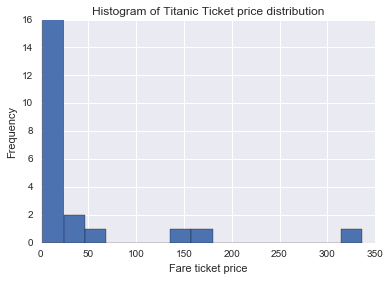

In [10]:
Data_Fare= data.groupby(data.Fare//10*10).size()
Data_Fare.plot(kind='hist',bins=15)
plt.xlabel('Fare ticket price')
plt.title("Histogram of Titanic Ticket price distribution")
plt.show()

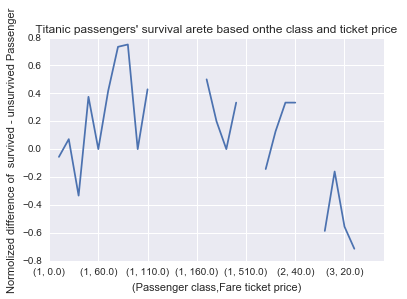

In [37]:
Total_clean_survive = data[data['Survived'].notnull() & data['Pclass'].notnull() & data['Fare'].notnull()]
Data_Survive_Fare_class=Total_clean_survive.groupby(['Survived','Pclass',data.Fare//10*10]).size()
Data_Survive_Fare_class=Data_Survive_Fare_class.unstack(0)
Data_Survive_Fare_class

Total_class_fare = Data_Survive_Fare_class[0]+Data_Survive_Fare_class[1]
difrence = (Data_Survive_Fare_class[1]-Data_Survive_Fare_class[0])/Total_class_fare
difrence.plot()
plt.xlabel('(Passenger class,Fare ticket price)')
plt.ylabel('Normolized difference of  survived - unsurvived Passenger')
plt.title(" Titanic passengers' survival arete based onthe class and ticket price ")
plt.show()

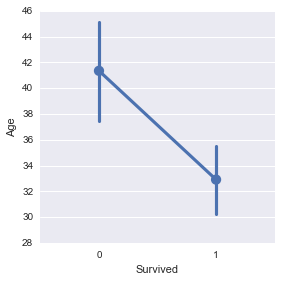

In [42]:
data_no_missing = data.dropna()
sns.factorplot(data=data_no_missing,x="Survived",y="Age")

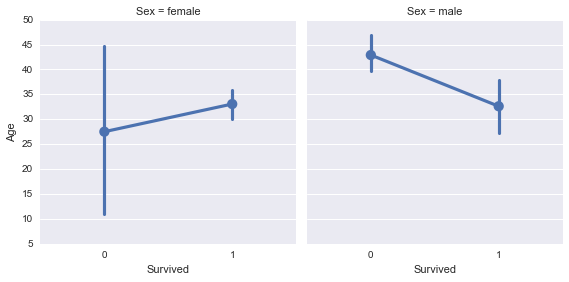

In [43]:
data_no_missing = data.dropna()
sns.factorplot(data=data_no_missing,x="Survived",y="Age",col="Sex")

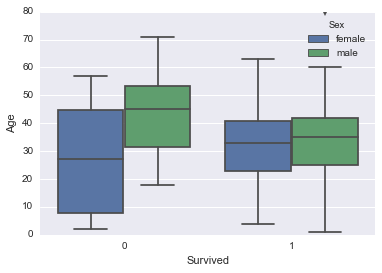

In [44]:
data_no_missing = data.dropna()
sns.boxplot(data=data_no_missing,x="Survived",y="Age",hue="Sex")

In [53]:
#g = sns.FacetGrid(data_no_missing, col="Pclass",row="Sex")  
#g.map(sns.distplot, "Age")  
#Group_age_1 = Total_clean_survive[Total_clean_survive["Age"]> 60]["Survived"] 
#Group_age_2 = Total_clean_survive[(Total_clean_survive["Age"]<60) &(Total_clean_survive["Age"]>40)]["Survived"] 
#Group_age_3 = Total_clean_survive[(Total_clean_survive["Age"]<40)["Survived"] 
#stats.f_oneway(Group_age_1, Group_age_2, Group_age_3)                                     